In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
sys.path.insert(0, '/directory/tothe/handshakefile/')
sys.path.append('/home/ak/Documents/PaperCode/stylised_facts')
import lob_for_futures as lobFut
from lob_for_futures import *
import os
import matplotlib.pyplot as plt


from dateutil.parser import parse
from pandas.tseries.offsets import BDay
import pickle as pkl
import fnmatch
import pickle
import datetime as dt
from datetime import timedelta
import glob
import fathon
from fathon import fathonUtils as fu

import pyinform as pyinf
import pingouin as pig
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon
from scipy.special import kl_div
import time
# dataFolder = lobFut.dataFolder
# quotes =[f for f in os.listdir(dataFolder) if str('_quotes') in f]
# trades =[f for f in os.listdir(dataFolder) if str('_trades') in f]

# symbolIdx = 9
# symbols = [f.split("_")[0] for f in quotes]

# symbol = sorted(symbols)[symbolIdx]
# print(symbol)
# quotesFileCh = os.path.join(dataFolder, quotes[symbolIdx])
# tradesFileCh = os.path.join(dataFolder, trades[symbolIdx])

# # get common Dates
# quotesDates = sorted([f.split(".csv")[0] for f in os.listdir(quotesFileCh)])
# tradesDates = sorted([f.split(".csv")[0] for f in os.listdir(tradesFileCh)])
# intersectionDates = list(set(quotesDates).intersection(tradesDates))

# trades_cols = ['size', 'time', 'type', 'value']



In [6]:
def symbol_file_name_path(symbol, file_idx):
    symbolPath = os.path.join(experimentsDestination, str(symbol))
    file_names =sorted(os.listdir(symbolPath))
    file_name =file_names[file_idx]
    file_path =os.path.join(symbolPath, file_name)
    return file_names, file_path


In [7]:
import matplotlib as mpl


In [8]:
mpl.get_configdir()
# plot parametrisations
latex_styles = os.listdir(mpl.get_configdir())
latex_styles

['latexstyle2.mplstyle', 'latexstyle.mplstyle']

In [143]:

plt.style.use(os.path.join(mpl.get_configdir(), latex_styles[1]))

In [144]:
figures_destination = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures'

In [49]:

def open_pickle_filepath(pickle_file):
    pickle_to_file = pickle.load(open(pickle_file, "rb"), encoding='latin1')

    return pickle_to_file

In [50]:
def n_F(dicts, bar):
    df = pd.DataFrame.from_dict(dicts[str(bar)])
    n = df.index.values
    F = df.median(axis=1).values
    return n, F
def h_params(h_dict, bar):
    h_df = pd.DataFrame.from_dict(h_dict[str(bar)]).T.median(axis=0)
    H_intercept = h_df[1]
    H = h_df[0]
    return H_intercept, H

In [73]:
experimentsDestination = '/media/ak/T71/MFDFA Experiments/'
symbols = os.listdir(experimentsDestination)
symbolIdx = 0
symbol = symbols[symbolIdx]
files = sorted(os.listdir(os.path.join('/media/ak/T71/MFDFA Experiments/', symbol)))
print(symbol)


JB1


In [38]:
## DFA_h_dict_valuesvolume_width100calendar_resample200S_bar_

In [72]:
## 'DFA_H_values_bar_calendar
pickle_file_path = os.path.join(experimentsDestination,symbol, files[1]) # this is the h_dict dfa
dfa_n_f_file_path = os.path.join(experimentsDestination,symbol,  files[0]) # this is the dfa
print(pickle_file_path)

/media/ak/T71/MFDFA Experiments/JB1/MDFA_n_f_valuesvolume_width100calendar_resample300S_bar_20180815_calendar.pkl


In [42]:
# read the DFA Dicts
H_dicts = open_pickle_filepath(pickle_file_path)
# returns h_dict[j][i] = [H, H_intercept] # bar/date: H, H_intercept
DFA_dates = list(H_dicts.keys())
bars = ['tick', 'volume', 'dollar', 'calendar']
DFA_n_f_dicts = open_pickle_filepath(dfa_n_f_file_path)
barIdx = 0
bars = ['tick', 'volume', 'dollar', 'calendar']
unpickled_dict = DFA_n_f_dicts[bars[barIdx]]

DFA_dates = sorted(list(unpickled_dict.keys()))
# date_idx = 1

# dicts = unpickled_dict[DFA_dates[date_idx]]

# df_tick =pd.DataFrame.from_dict(DFA_n_f_dicts[bars[0]])
# n_tick = df_tick.index.values
# F_tick = df_tick.median(axis=1).values

# #   Slope of the fit for each q-order.

# H_tick =pd.DataFrame.from_dict(H_dicts[bars[barIdx]]).T[0].median() # compute the median across all days

# #   Intercept of the fit for each q-order.

# H_intercept_tick = pd.DataFrame.from_dict(H_dicts[bars[barIdx]]).T[1].median()


# df_volume =pd.DataFrame.from_dict(DFA_n_f_dicts[bars[1]])
# n_volume = df_volume.index.values
# F_volume = df_volume.median(axis=1).values

# H_volume =pd.DataFrame.from_dict(H_dicts[bars[1]]).T[0].median() # compute the median across all days


In [43]:
DFA_dates

['20180511', '20180815', '20180921']

In [45]:
DFA_dates = list(unpickled_dict.keys())
bars = ['tick', 'volume', 'dollar', 'calendar']

date_idx = 0

dicts = unpickled_dict[DFA_dates[date_idx]]

df_tick =pd.DataFrame.from_dict(DFA_n_f_dicts[bars[0]])
n_tick = df_tick.index.values
F_tick = df_tick.median(axis=1).values


# #   Slope of the fit for each q-order.

# H_tick =pd.DataFrame.from_dict(H_dicts[bars[barIdx]]).T[0].median() # compute the median across all days

# #   Intercept of the fit for each q-order.

# H_intercept_tick = pd.DataFrame.from_dict(H_dicts[bars[barIdx]]).T[1].median()


# df_volume =pd.DataFrame.from_dict(DFA_n_f_dicts[bars[1]])
# n_volume = df_volume.index.values
# F_volume = df_volume.median(axis=1).values

# H_volume =pd.DataFrame.from_dict(H_dicts[bars[1]]).T[0].median() # compute the median across all days
# H_intercept_volume= pd.DataFrame.from_dict(H_dicts[bars[1]]).T[1].median()

In [46]:
DFA_dates = list(unpickled_dict.keys())
DFA_dates

['20180511', '20180921', '20180815']

In [47]:

bars = ['tick', 'volume', 'dollar', 'calendar']

date_idx = 0

dicts = unpickled_dict[DFA_dates[date_idx]]

df_tick =pd.DataFrame.from_dict(DFA_n_f_dicts[bars[0]])
n_tick = df_tick.index.values
F_tick = df_tick.median(axis=1).values


#   Slope of the fit for each q-order.

H_tick =pd.DataFrame.from_dict(H_dicts[bars[barIdx]]).T[0].median() # compute the median across all days

#   Intercept of the fit for each q-order.

H_intercept_tick = pd.DataFrame.from_dict(H_dicts[bars[barIdx]]).T[1].median()


df_volume =pd.DataFrame.from_dict(DFA_n_f_dicts[bars[1]])
n_volume = df_volume.index.values
F_volume = df_volume.median(axis=1).values

H_volume =pd.DataFrame.from_dict(H_dicts[bars[1]]).T[0].median() # compute the median across all days
H_intercept_volume= pd.DataFrame.from_dict(H_dicts[bars[1]]).T[1].median()

############### -------------- #########################
df_dollar =pd.DataFrame.from_dict(DFA_n_f_dicts[bars[2]])
n_dollar = df_dollar.index.values
F_dollar = df_dollar.median(axis=1).values

H_dollar =pd.DataFrame.from_dict(H_dicts[bars[2]]).T[0].median() # compute the median across all days
H_intercept_dollar= pd.DataFrame.from_dict(H_dicts[bars[2]]).T[1].median()

############### -------------- #########################
df_calendar =pd.DataFrame.from_dict(DFA_n_f_dicts[bars[3]])
n_calendar = df_calendar.index.values
F_calendar = df_calendar.median(axis=1).values

H_calendar =pd.DataFrame.from_dict(H_dicts[bars[3]]).T[0].median() # compute the median across all days
H_intercept_calendar = pd.DataFrame.from_dict(H_dicts[bars[3]]).T[1].median()


KeyError: 0

In [24]:
_=plt.plot(np.log(n_tick), np.log(F_tick), 'ro')
_=plt.plot(np.log(n_tick), H_intercept_tick + H_tick*np.log(n_tick), '--', label='H tick = {:.2f}'.format(H_tick), color='red', linestyle = ':')

_=plt.plot(np.log(n_calendar), np.log(F_calendar), 'bo', alpha =0.5)
_=plt.plot(np.log(n_calendar), H_intercept_calendar + H_calendar*np.log(n_calendar), '--', label='H calendar = {:.2f}'.format(H_calendar), color='b',linestyle = ':')


_=plt.plot(np.log(n_volume), np.log(F_volume), 'go', alpha =0.4)
_=plt.plot(np.log(n_volume), H_intercept_volume + H_volume*np.log(n_volume), '--', label='H volume = {:.2f}'.format(H_volume), color='g',linestyle = ':')


_=plt.plot(np.log(n_dollar), np.log(F_dollar), 'p-', alpha=0.35)
_=plt.plot(np.log(n_dollar), H_intercept_dollar + H_dollar*np.log(n_dollar), '--', label='H dollar = {:.2f}'.format(H_dollar), color='purple',linestyle = ':')
_=plt.xlabel('ln(n)')
_=plt.ylabel('ln(F(n))')
_=plt.legend(loc=4, prop={"size":10})

# ## below for the plot saving
title_file = 'fluctuation_vs_window_size_for_symbol_'+str(symbol)+'.png'
fig_location = os.path.join(figures_destination, title_file)
plt.savefig(fig_location)

NameError: name 'n_tick' is not defined

In [32]:
symbol

'TU1'

In [341]:
df =pd.DataFrame.from_dict(example_dict[keys[1]])
bar_types =list(df.columns.values)
n = df.index.values

NameError: name 'example_dict' is not defined

In [31]:
os.listdir(experimentsDestination)

['JB1',
 'FB1',
 'TU1',
 'VIX',
 'RX1',
 'YM1',
 'VXX',
 'OE1',
 'FV1',
 'G',
 'TY1',
 'DU1',
 'KE1',
 'US1',
 'XM1']

In [343]:
# F = df[bar_types[2]].values
# plt.plot(np.log(n), np.log(F), 'ro')
# plt.plot(np.log(n), H_intercept+H*np.log(n), '--', label='H = {:.2f}'.format(H))
# plt.xlabel('ln(n)', fontsize=14)
# plt.ylabel('ln(F(n))', fontsize=14)
# plt.title('DFA', fontsize=14)
# plt.legend(loc=0, fontsize=14)

In [74]:
symbol = 'TU1'

symbolPath = os.path.join(experimentsDestination, symbol)


In [75]:
symbolFiles  = os.listdir(symbolPath)

In [76]:
experimentsDestination

'/media/ak/T71/MFDFA Experiments/'

In [82]:
symbolFilePath_H = os.path.join(symbolPath, symbolFiles[0])
symbolFilePath_n_F = os.path.join(symbolPath, symbolFiles[1])

In [81]:
# file_names, file_path = symbol_file_name_path(symbol='RX1', file_idx=2)
# print(file_path)
# len(file_names)

In [83]:
dicts = open_pickle_filepath(file_path)

NameError: name 'file_path' is not defined

In [204]:
dates =list(dicts['tick'].keys())
len(dates)

3

In [205]:
bar_choice = 'tick'
# tick bar
mfSpect_tick =list()
alpha_tick =list()
# dollar bar
mfSpect_dollar =list()
alpha_dollar =list()

# calendar bar
mfSpect_calendar =list()
alpha_calendar =list()

# calendar bar
mfSpect_volume =list()
alpha_volume =list()




for i in range(len(dates)):
    mfSpect_tick.append(dicts[str(bar_choice)][dates[i]][0])
    alpha_tick.append(dicts[str(bar_choice)][dates[i]][1])
    # dollar
    mfSpect_dollar.append(dicts['dollar'][dates[i]][0])
    alpha_dollar.append(dicts['dollar'][dates[i]][1])
    # calendar
    mfSpect_calendar.append(dicts['calendar'][dates[i]][0])
    alpha_calendar.append(dicts['calendar'][dates[i]][1])
    # usd volume
    mfSpect_volume.append(dicts['volume'][dates[i]][0])
    alpha_volume.append(dicts['volume'][dates[i]][1])
    
    


In [206]:
'tick'
x_tick = pd.DataFrame(list(map(np.ravel, mfSpect_tick))).median(axis=0)
y_tick = pd.DataFrame(list(map(np.ravel, alpha_tick))).median(axis=0)
'dollar'
x_dollar = pd.DataFrame(list(map(np.ravel, mfSpect_dollar))).median(axis=0)
y_dollar = pd.DataFrame(list(map(np.ravel, alpha_dollar))).median(axis=0)

'calendar'
x_calendar = pd.DataFrame(list(map(np.ravel, mfSpect_calendar))).median(axis=0)
y_calendar = pd.DataFrame(list(map(np.ravel, alpha_calendar))).median(axis=0)

'volume'
x_volume = pd.DataFrame(list(map(np.ravel, mfSpect_volume))).median(axis=0)
y_volume = pd.DataFrame(list(map(np.ravel, alpha_volume))).median(axis=0)



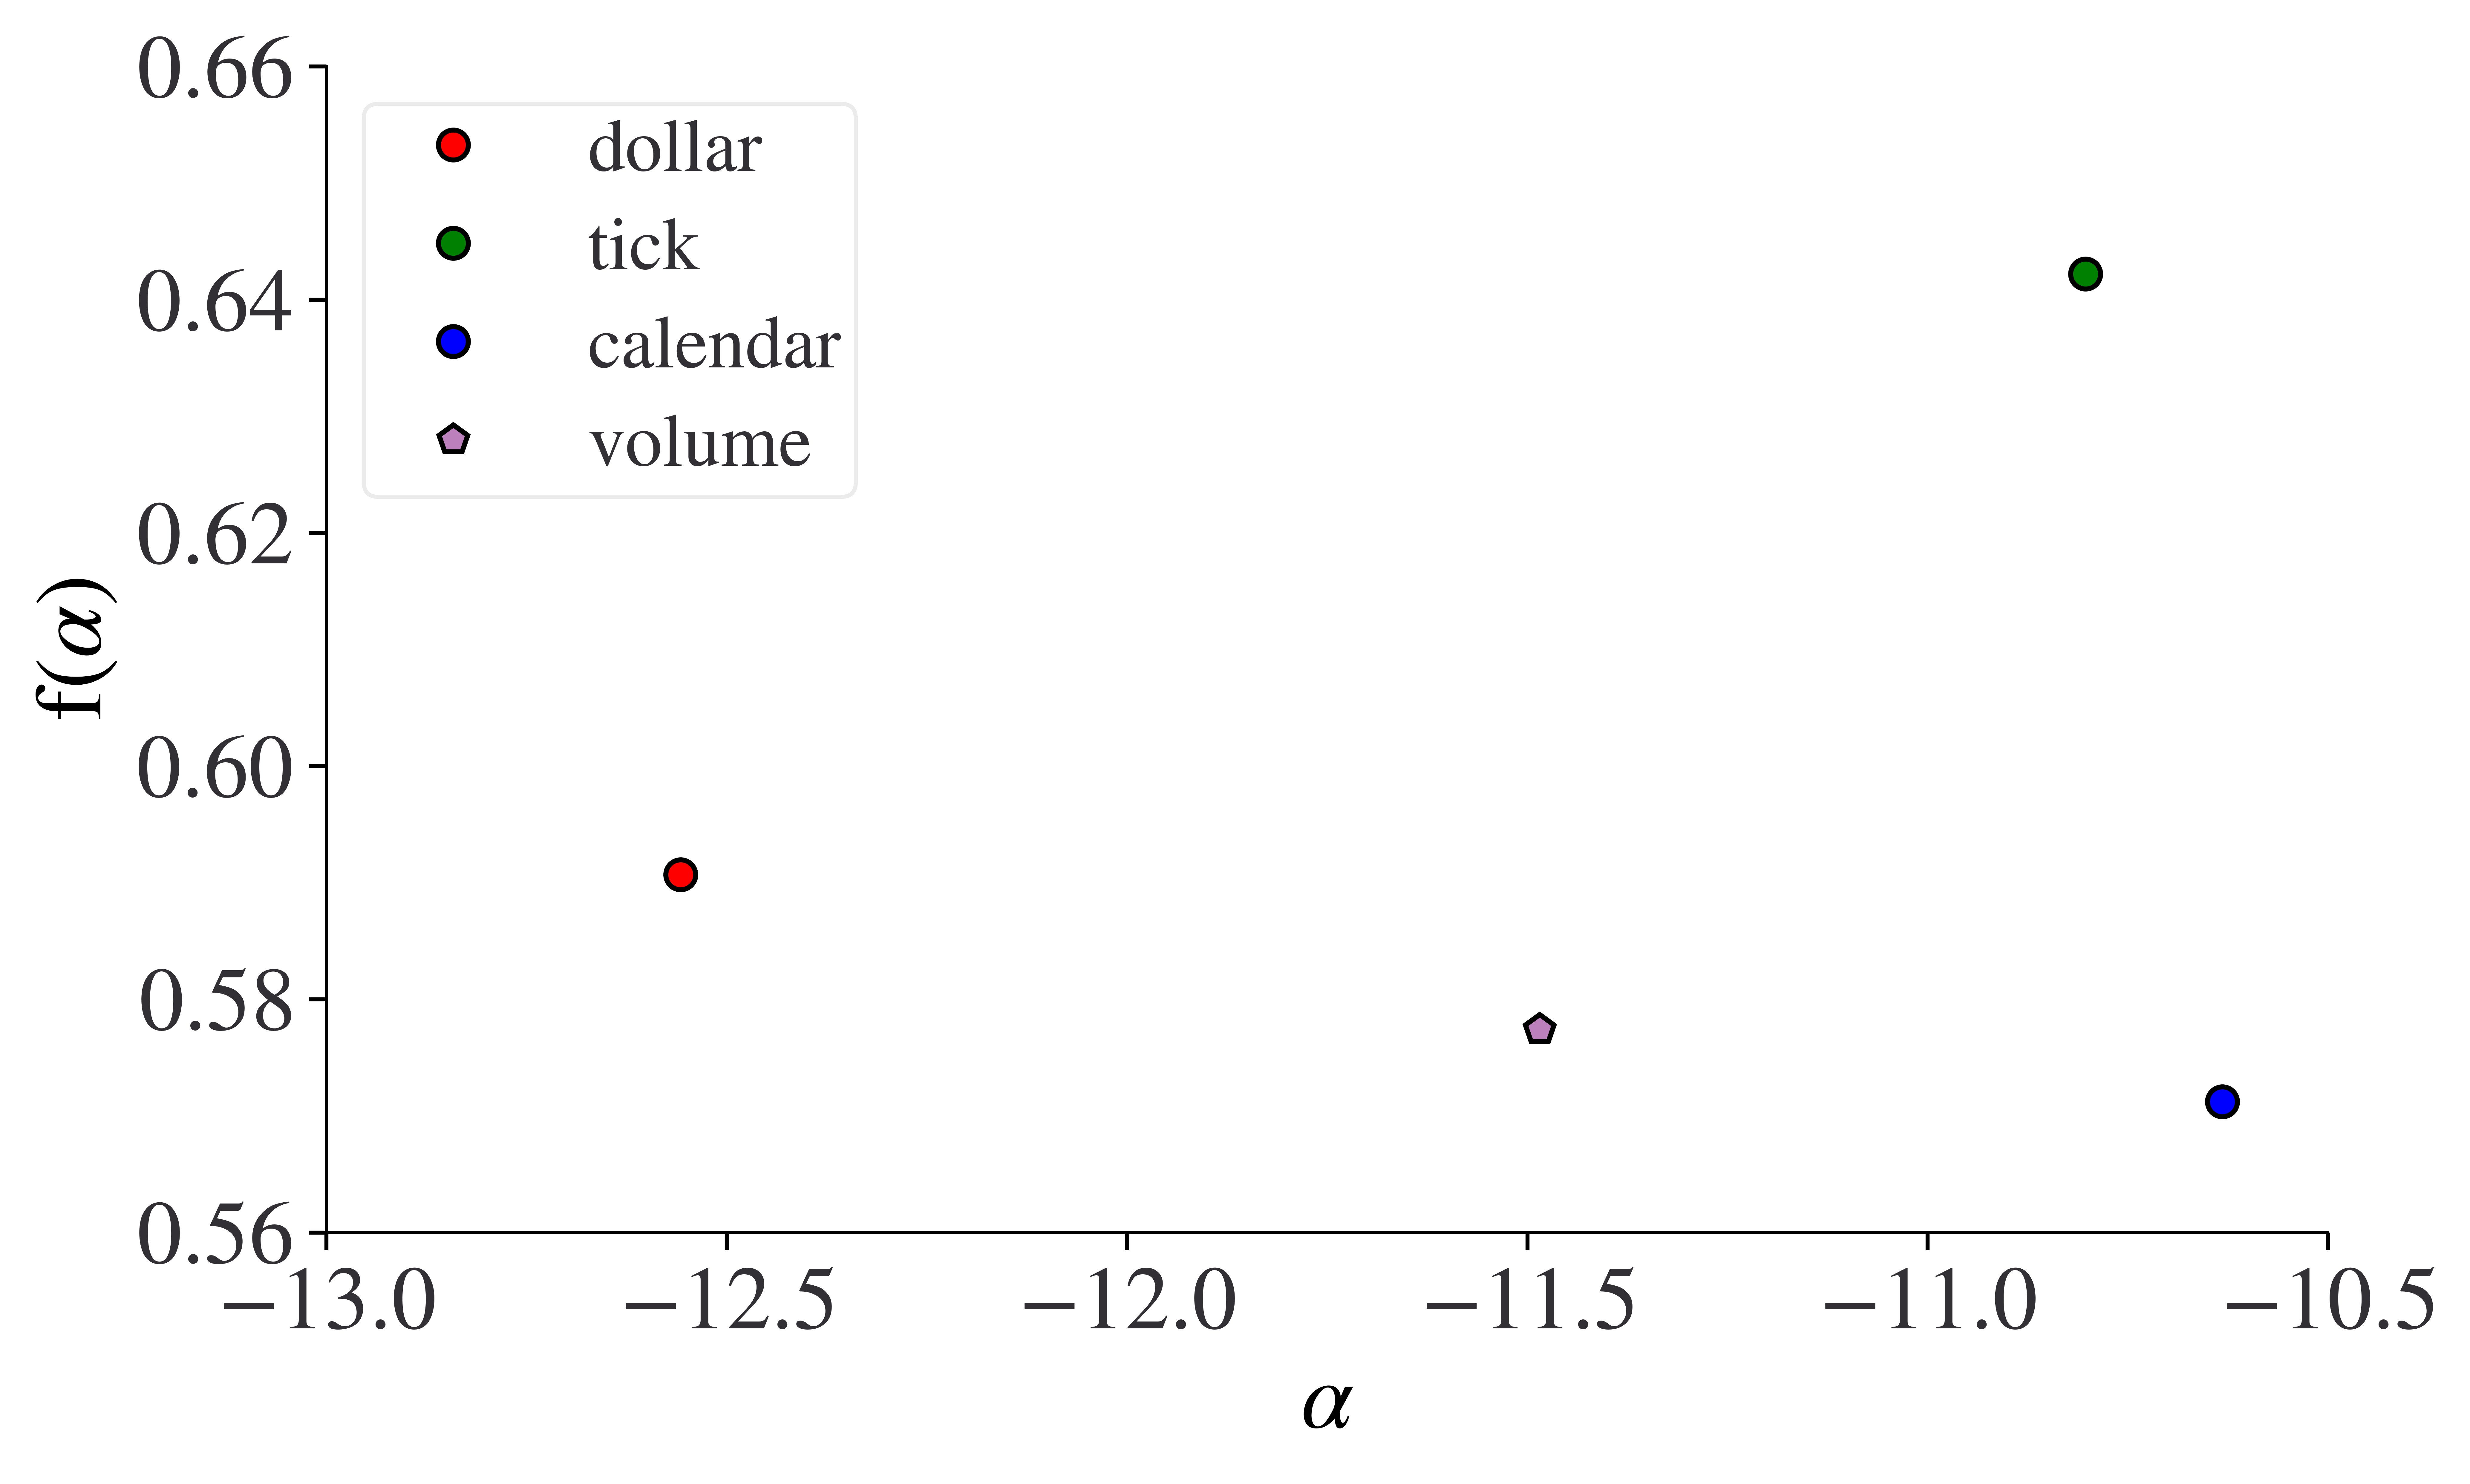

<Figure size 8640x5340 with 0 Axes>

In [207]:
plt.plot(y_dollar, x_dollar, 'ro-', label ='dollar',linestyle="None")
plt.plot(y_tick, x_tick, 'go-', label ='tick' ,linestyle="None")
plt.plot(y_calendar, x_calendar, 'bo-', label ='calendar' ,linestyle="None")
plt.plot(y_volume, x_volume, 'p--', label ='volume' ,linestyle="None")


plt.xlabel('$\\alpha$')
plt.ylabel('f($\\alpha$)')

# ## below for the plot saving
title_file = 'multifractal_spectrum_vs_alpha_for_symbol_'+str(symbol)+'.png'
fig_location = os.path.join(figures_destination, title_file)
plt.legend()
plt.show()
#Singularity strengths (alpha)
#Multifractal spectrum.
plt.savefig(fig_location)

In [32]:
df_tick = pd.DataFrame(list(map(np.ravel, mfSpect_tick))).T
df_dollar = pd.DataFrame(list(map(np.ravel, mfSpect_dollar))).T
df_volume = pd.DataFrame(list(map(np.ravel, mfSpect_volume))).T
df_calendar = pd.DataFrame(list(map(np.ravel, mfSpect_calendar))).T


No handles with labels found to put in legend.
No handles with labels found to put in legend.


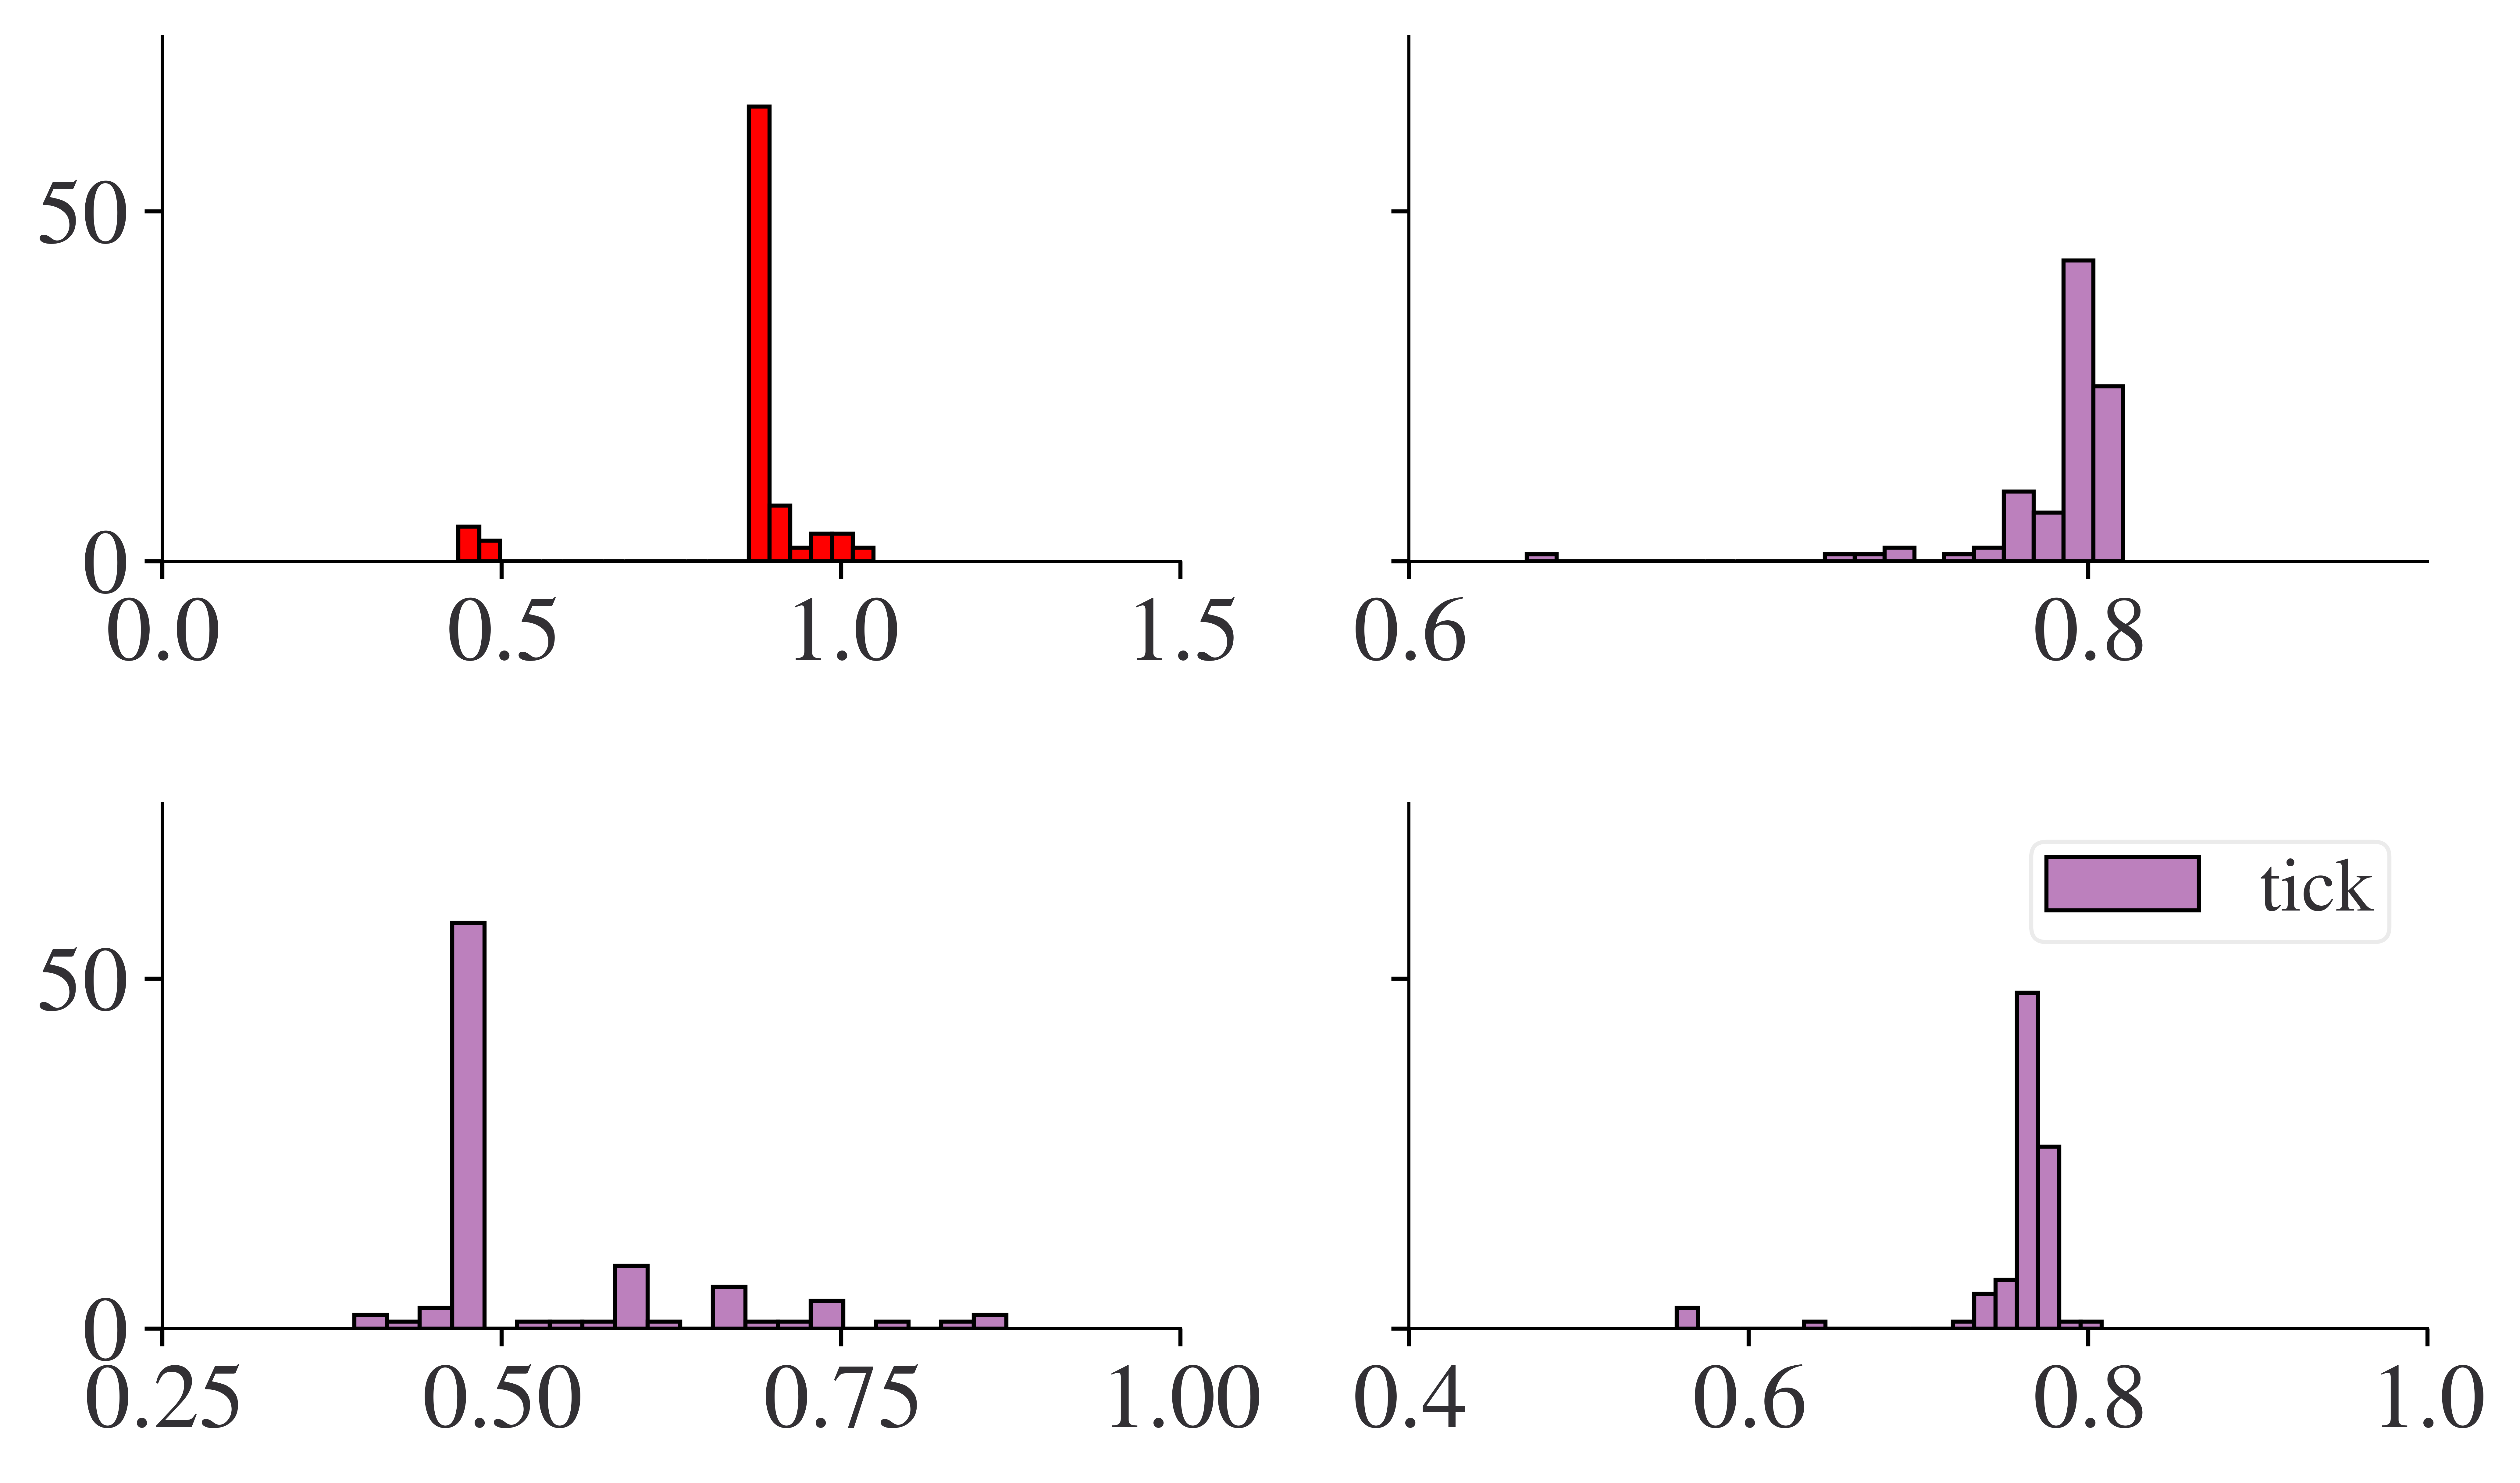

In [33]:
fig, axs = plt.subplots(2, 2, sharey = True)
_= axs[0,0].hist(df_volume.median(axis=0), bins =20, color ='r', label='volume')
plt.legend()
_= axs[1,0].hist(df_dollar.median(axis=0), bins =20, label ='dollar')
plt.legend()
_= axs[1,1].hist(df_tick.median(axis=0), bins =20, label ='tick')
_= axs[0,1].hist(df_calendar.median(axis=0), bins =20, label ='calendar')
plt.legend()

# fix the labels here

/home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ax.set_position(ax._sharey.figbox)


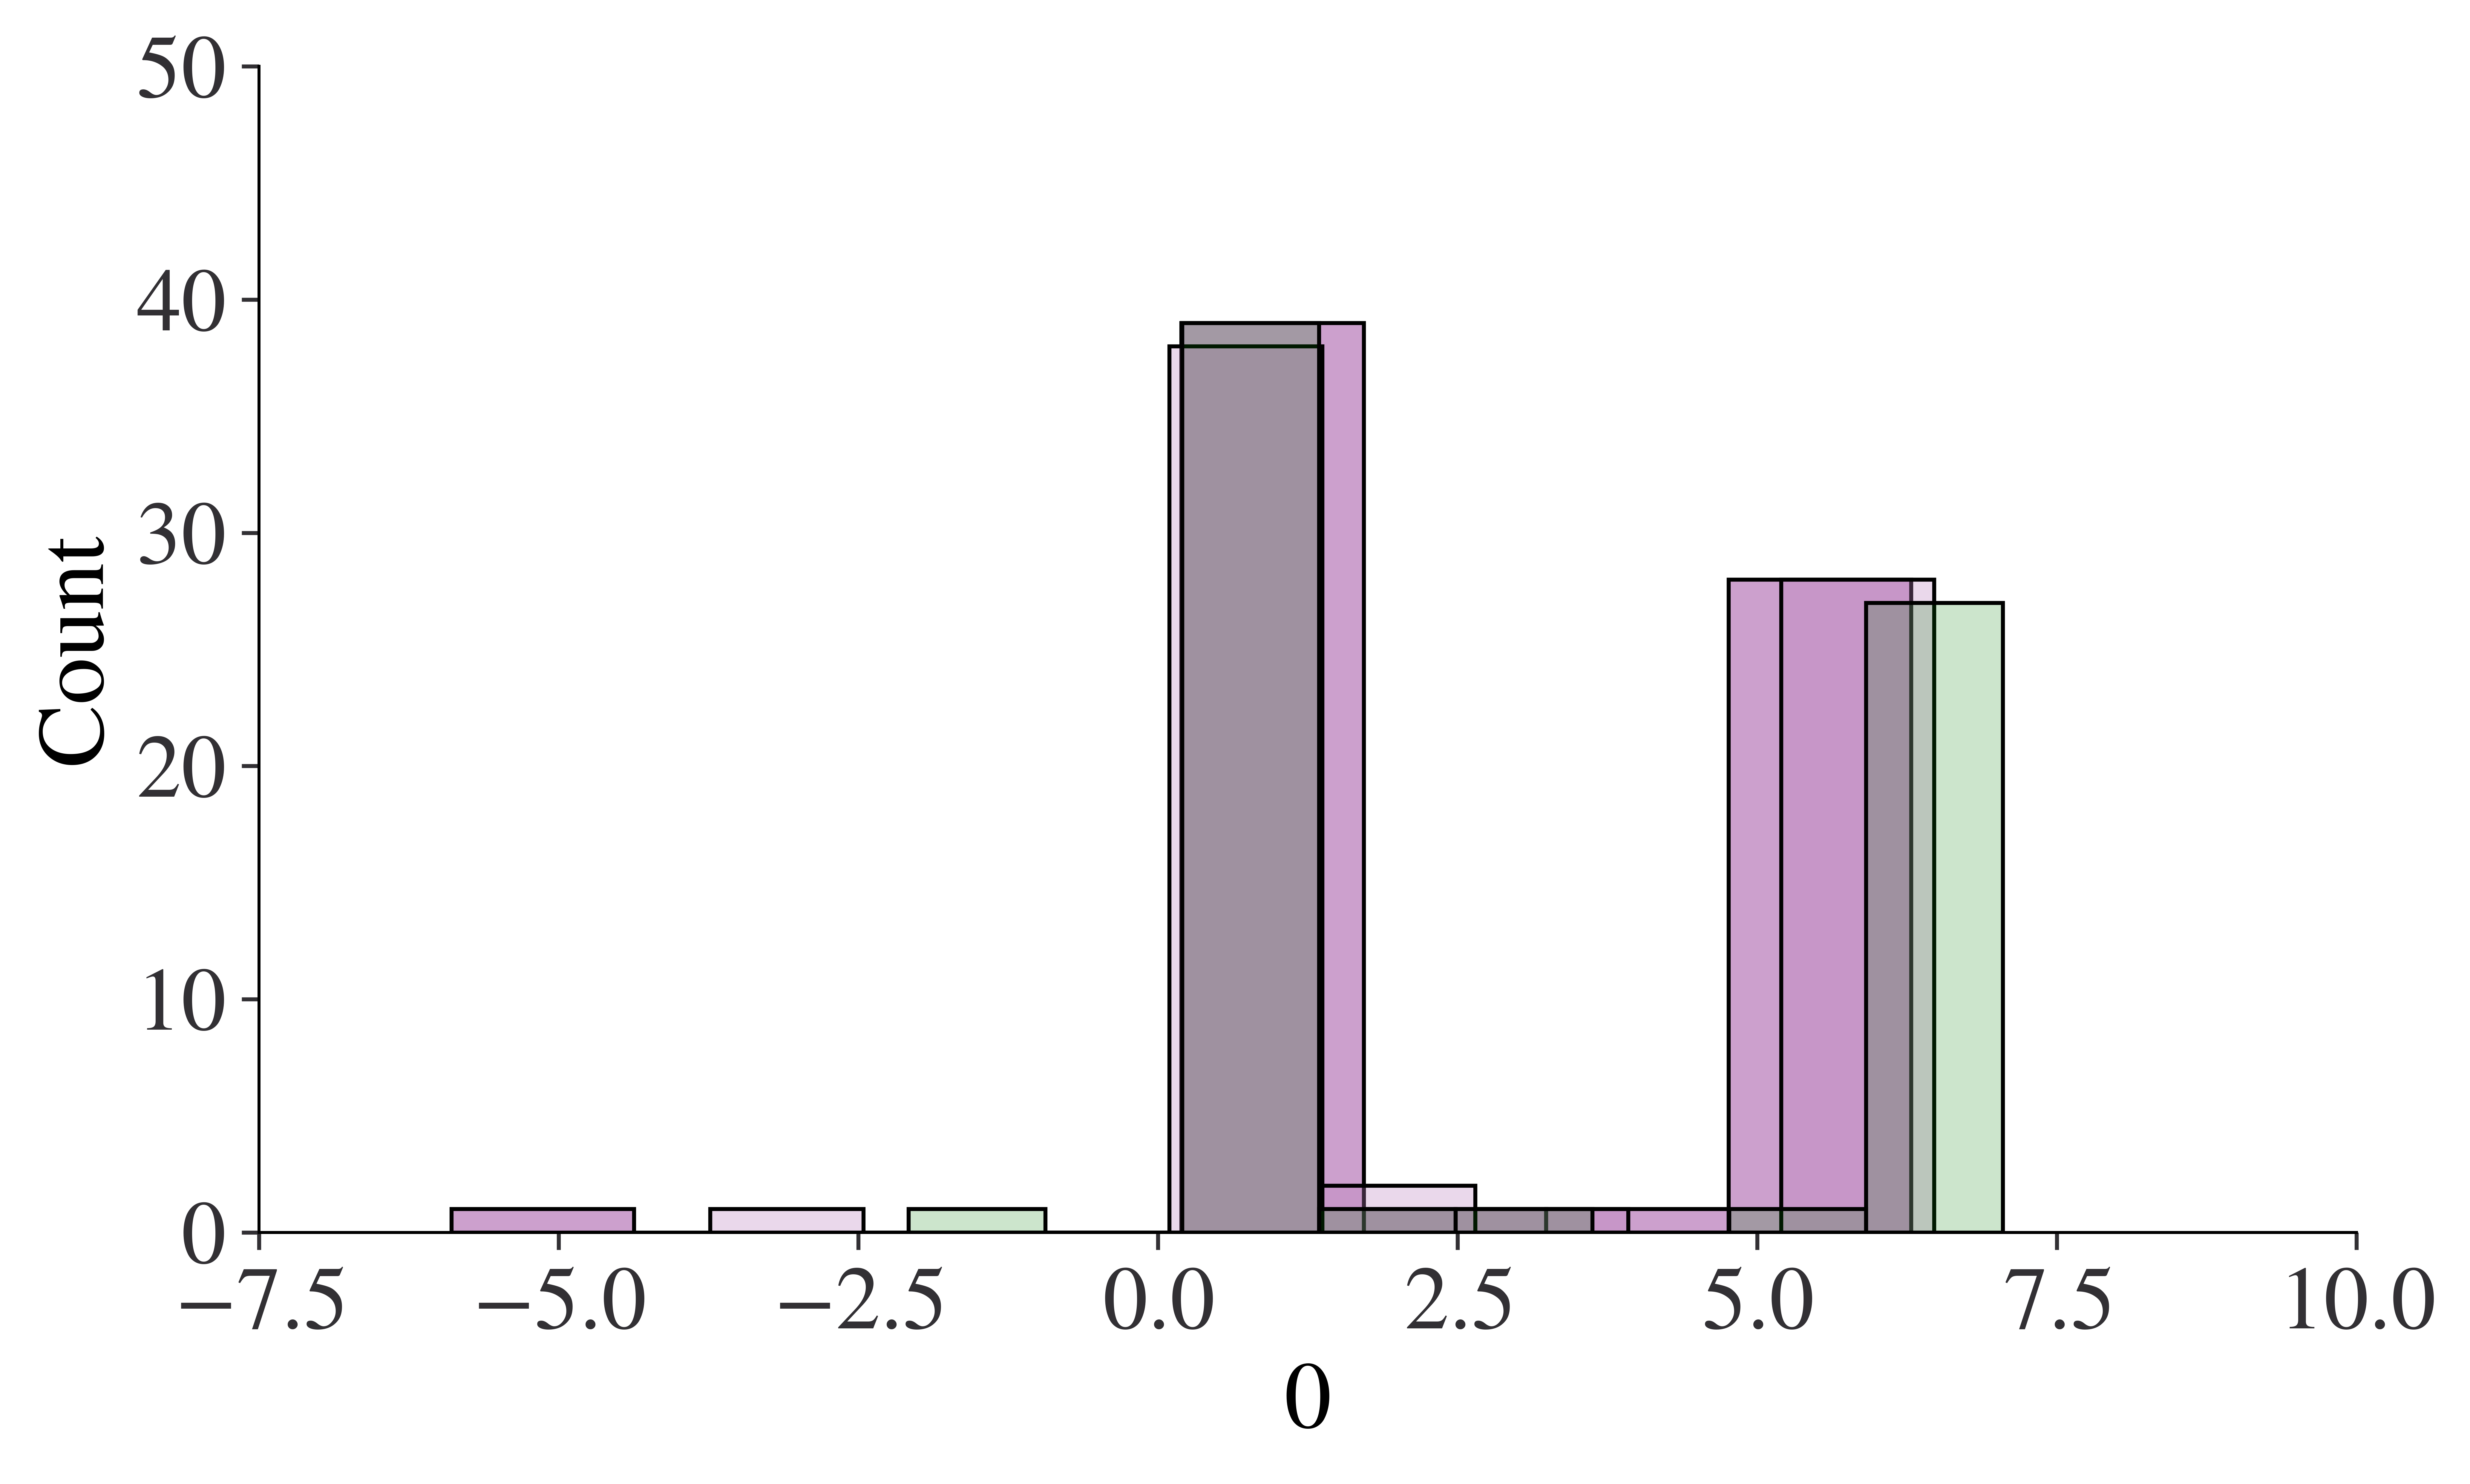

In [371]:
sns.histplot(df_volume[0])
sns.histplot(df_volume[1], alpha =0.3)
sns.histplot(df_volume[2], alpha =0.2, color ='g')


In [372]:
axis_no =0
tick_median =  df_tick.median(axis=axis_no)
volume_median =  df_volume.median(axis=axis_no)
calendar_median =  df_calendar.median(axis=axis_no)
dollar_median =  df_dollar.median(axis=axis_no)

df_list = [tick_median, volume_median, calendar_median, dollar_median]
all_dfs = pd.concat(df_list, axis=1)
all_dfs.columns = [ 'tick', 'volume', 'calendar', 'dollar' ]


No handles with labels found to put in legend.


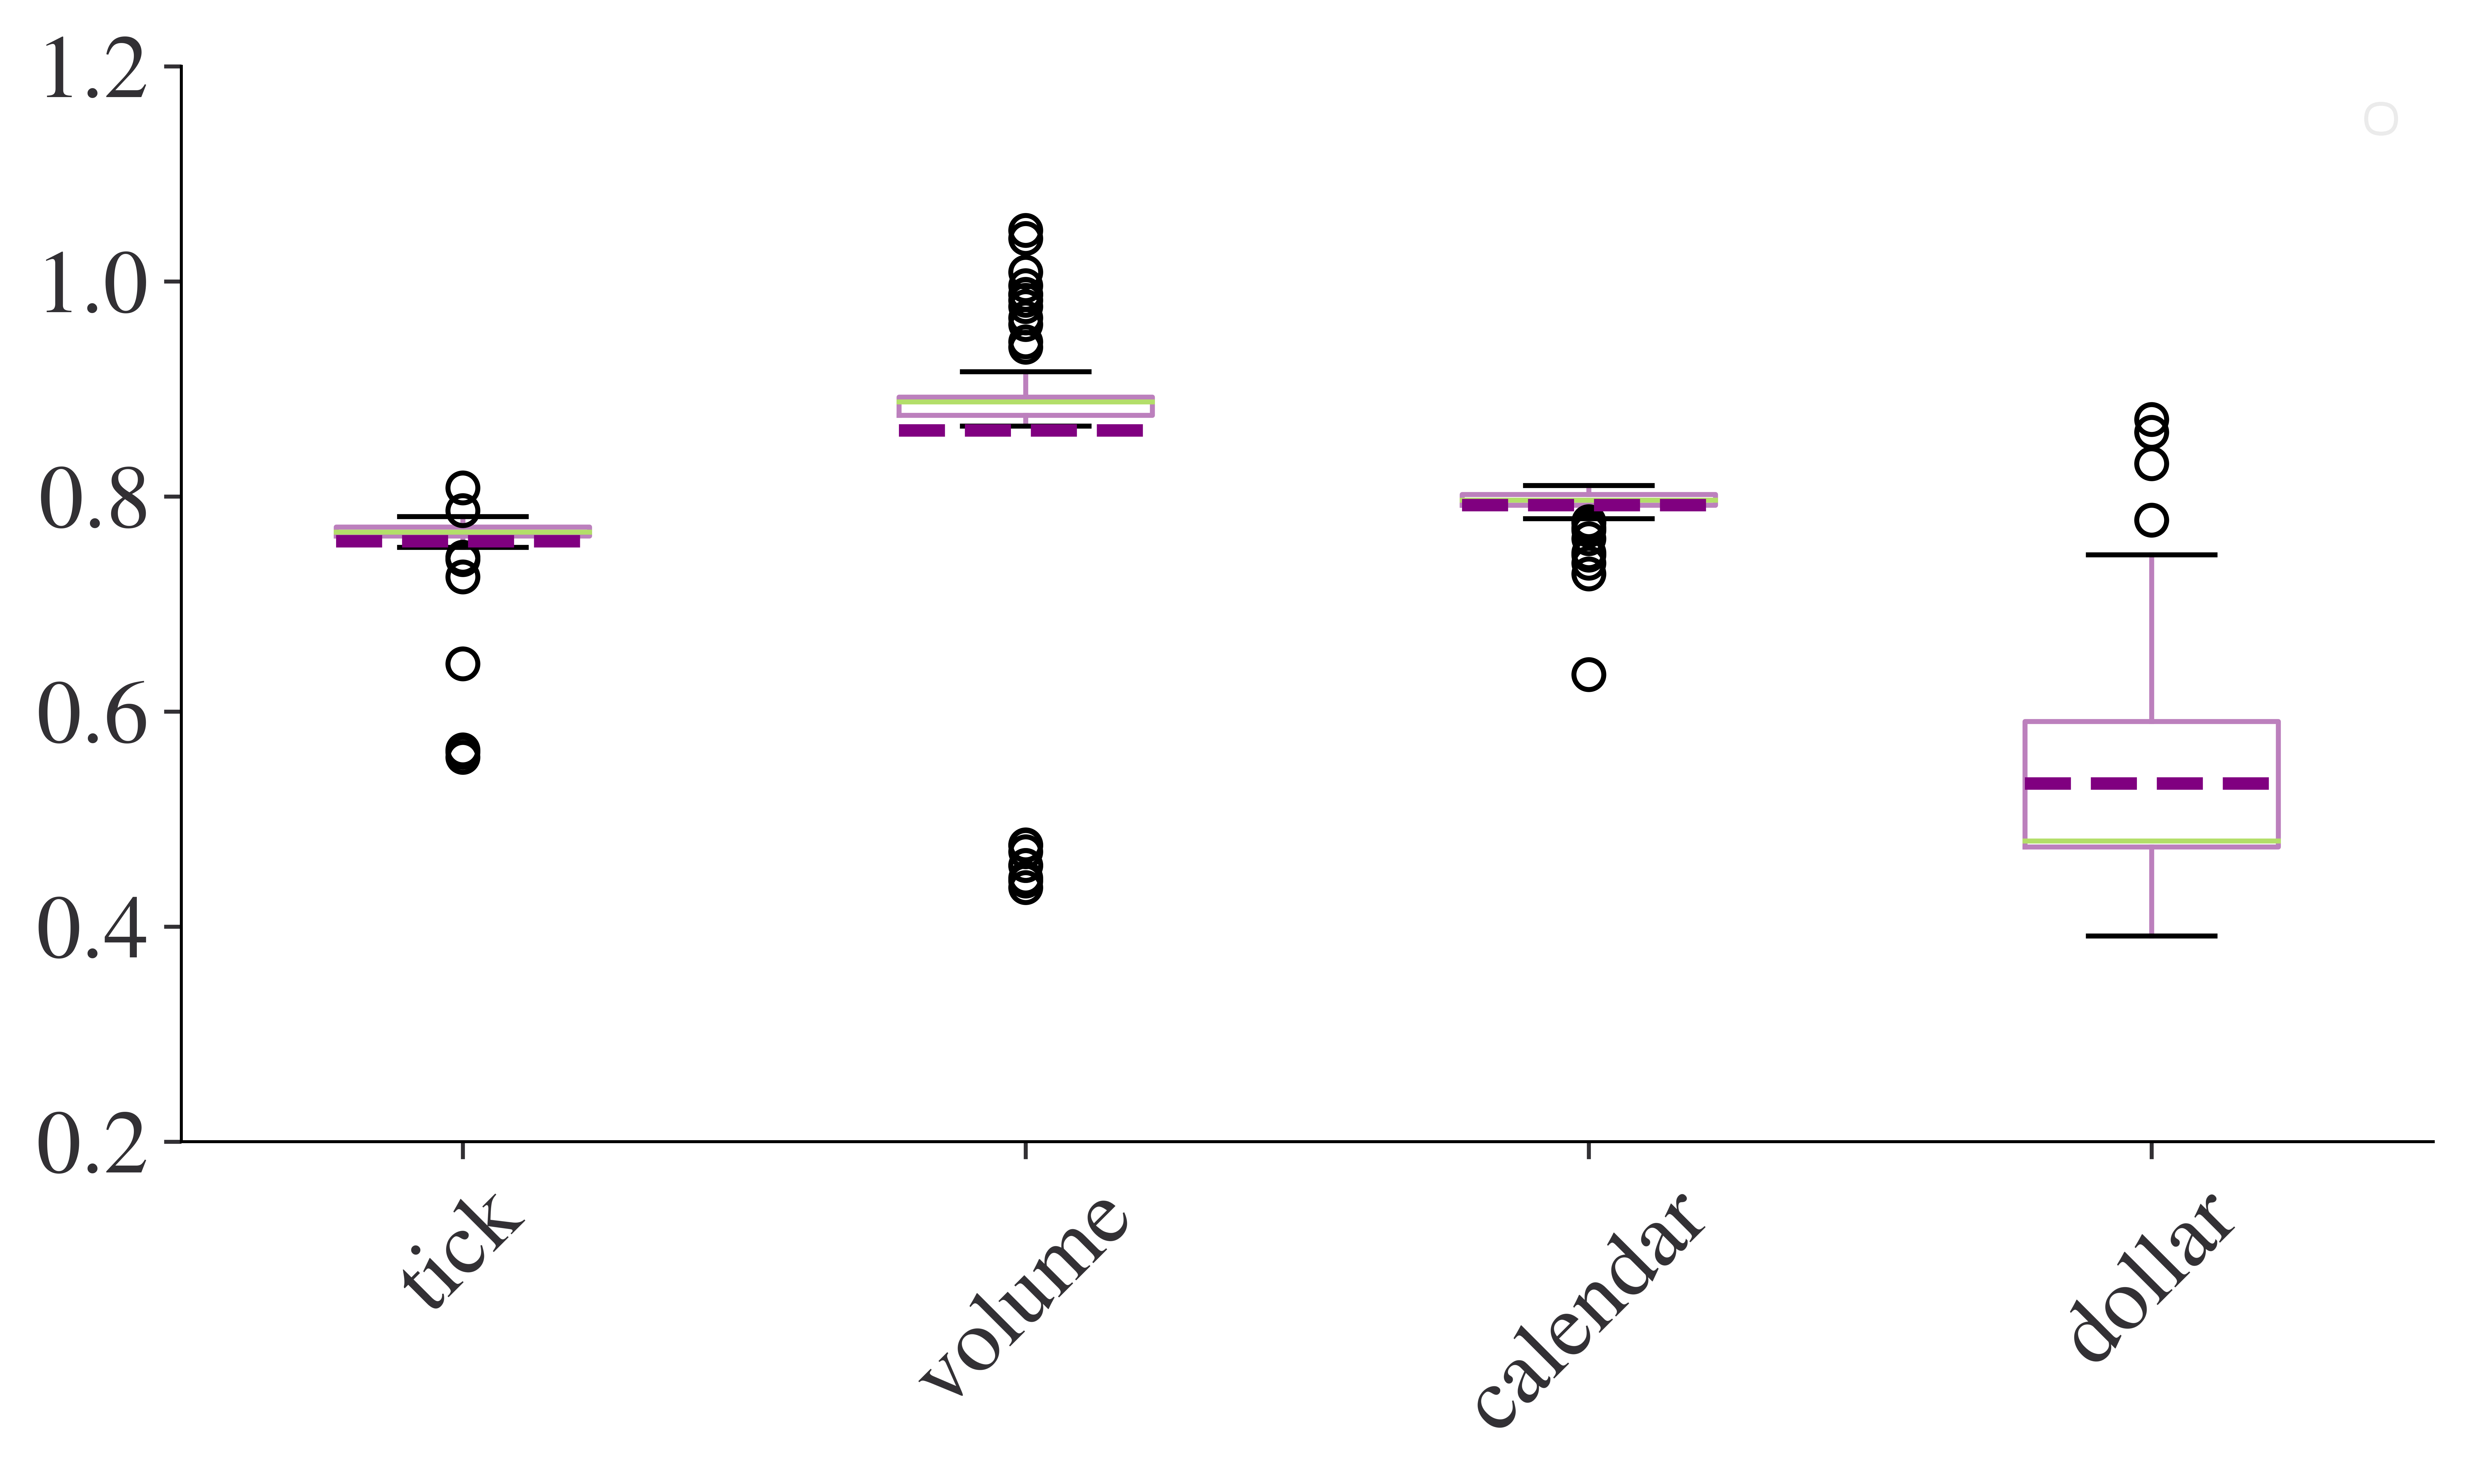

In [373]:
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  markeredgecolor='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
all_dfs.boxplot(grid=False, rot=45, meanprops=meanlineprops, meanline=True,
                  showmeans=True)


plt.legend()

/home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ax.set_position(ax._sharey.figbox)


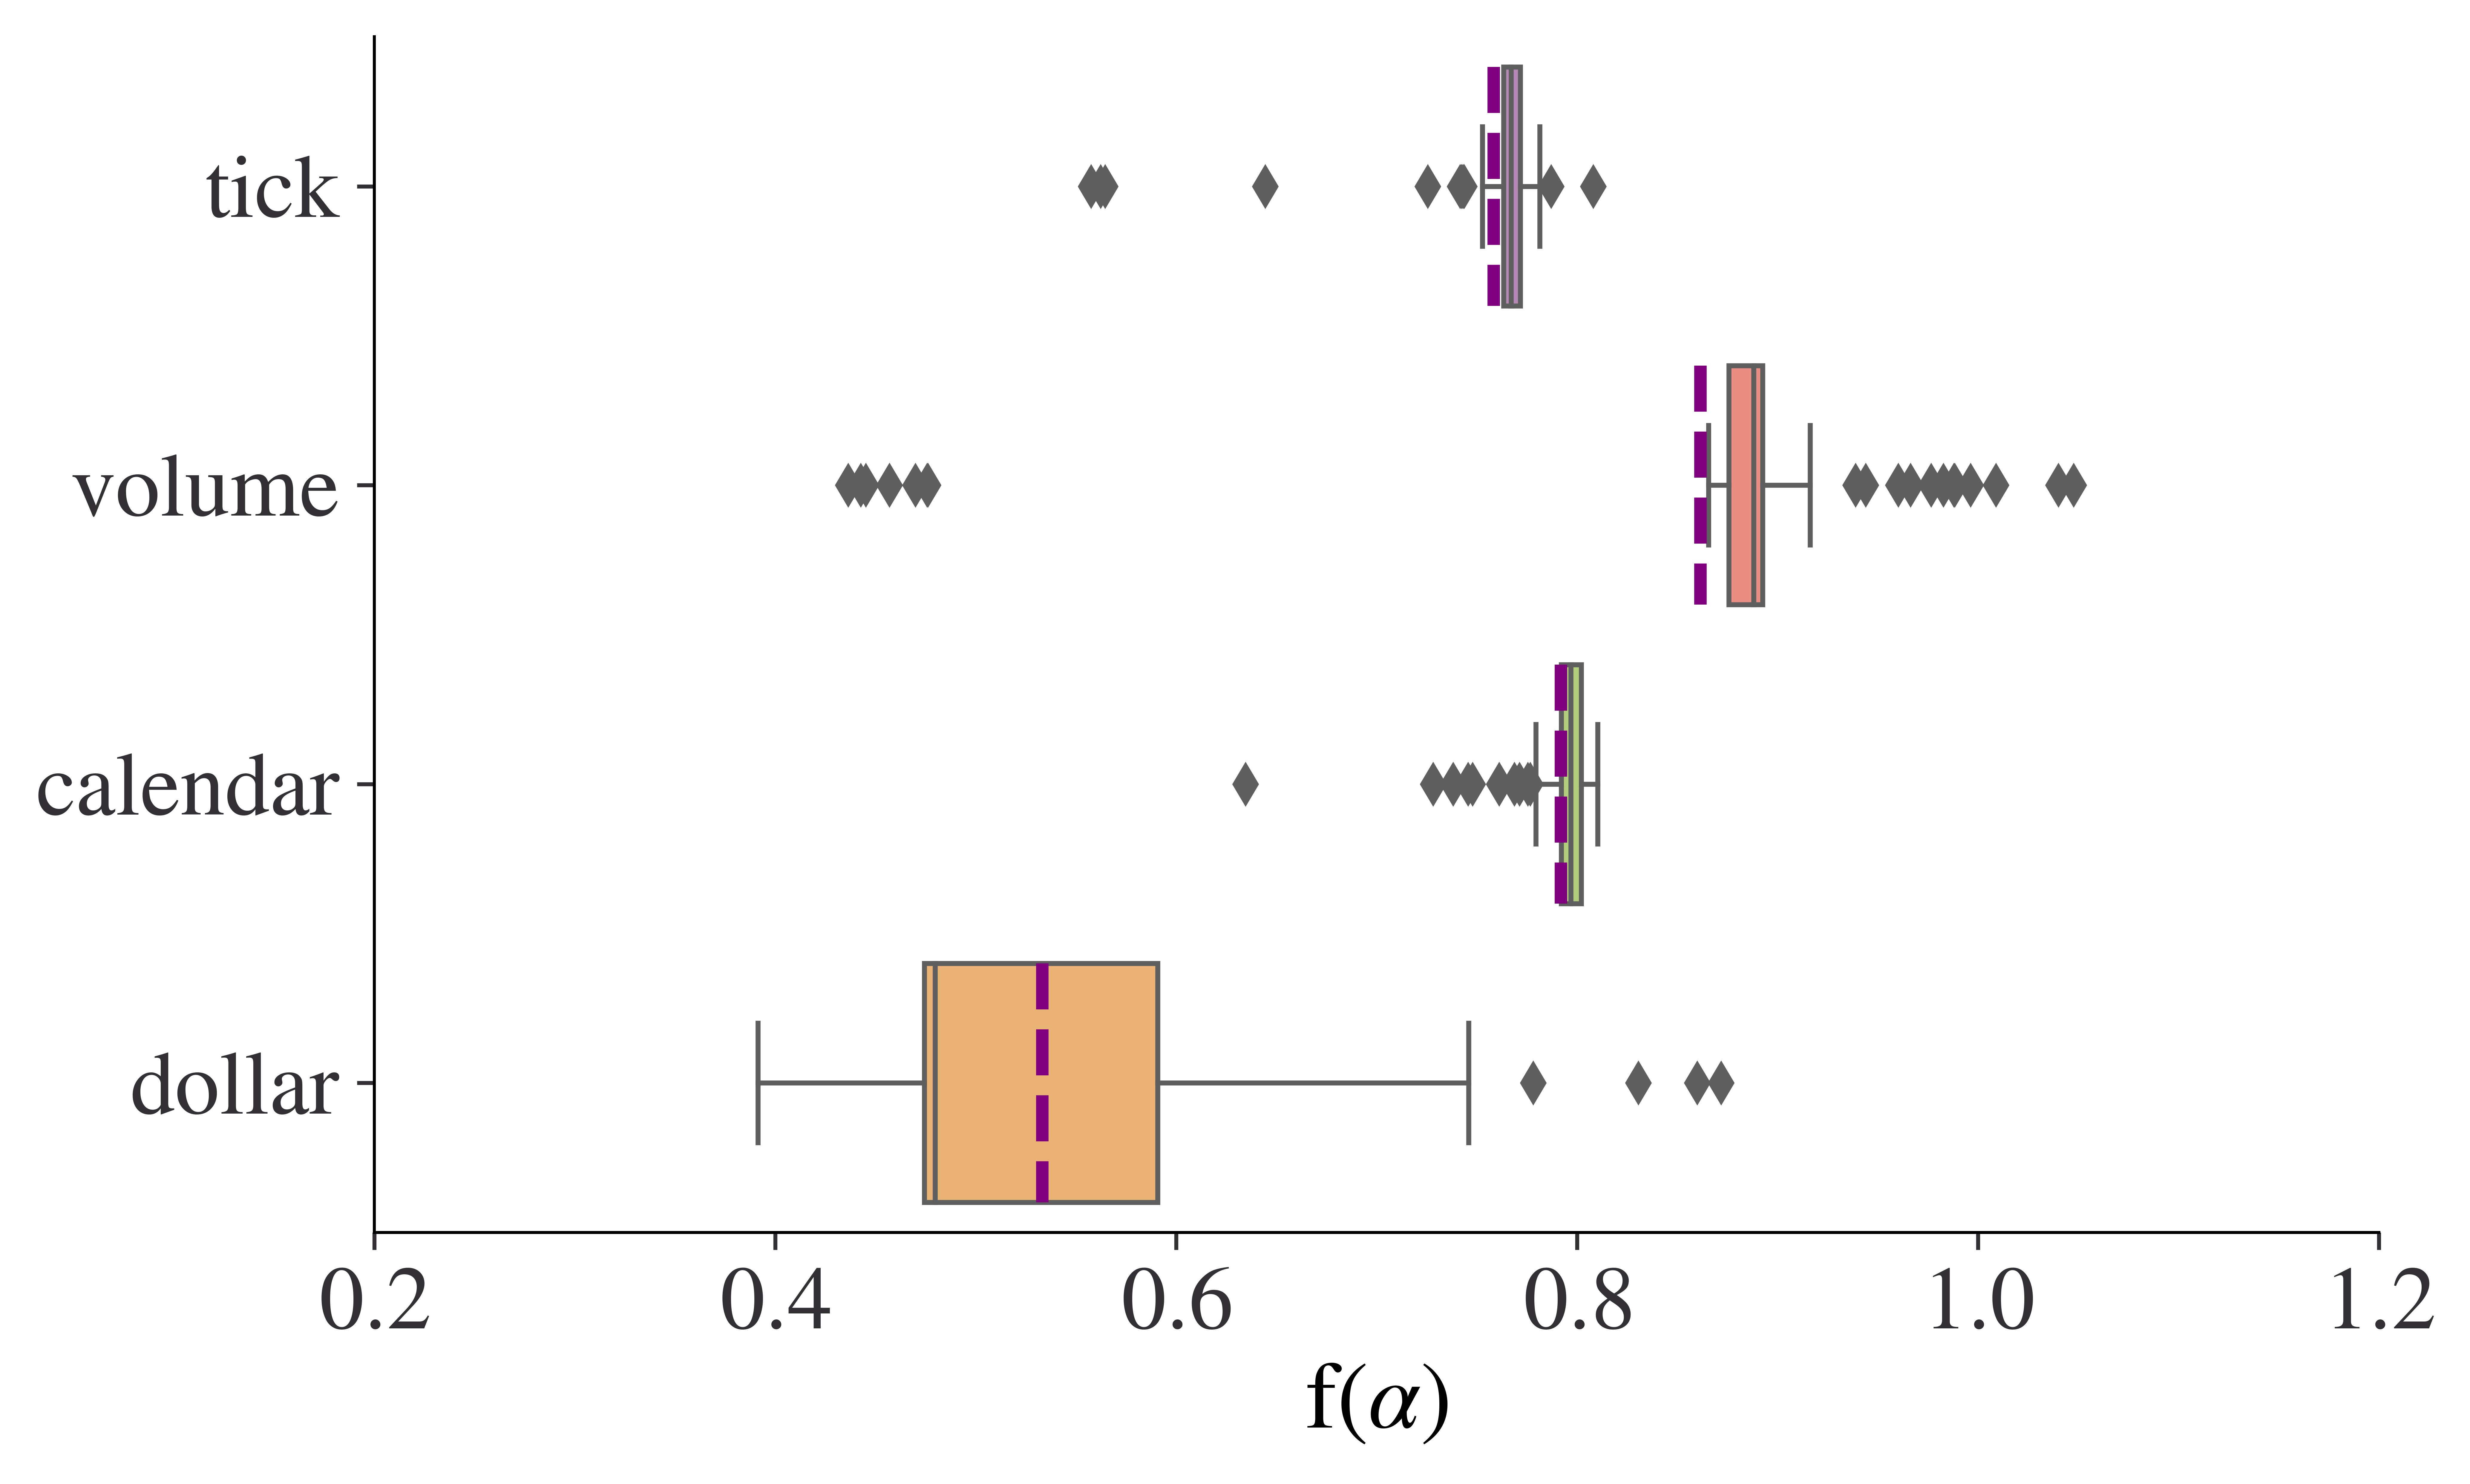

In [374]:
sns.color_palette("coolwarm", as_cmap=True)
sns.boxplot(data=all_dfs,meanprops=meanlineprops, meanline=True, 
                  showmeans=True,   orient ="h", linewidth=1.0)
plt.xlabel('f($\\alpha$)')
## below for the plot saving
title_file = 'median_boxplot_'+str(symbol)+'.png'
fig_location = os.path.join(figures_destination, title_file)
plt.savefig(fig_location)
plt.show()

In [180]:
_=sns.displot(tick_median, kde= True, linestyle = ":", color = 'purple', bins =40, label='tick')
_=plt.axvline(np.median(tick_median), color= "k", linestyle ="--")
_=plt.legend()
## below for the plot saving
title_file = 'median_histo_mfspect_tick'+str(symbol)+'.png'
fig_location = os.path.join(figures_destination, title_file)
plt.show()

_=sns.displot(volume_median, kde= True, linestyle = ":", color = 'grey', bins =40, label ='volume')
_=plt.axvline(np.median(volume_median), color= "k", linestyle ="--")

_=plt.legend()
## below for the plot saving
title_file = 'median_histo_mfspect_volume'+str(symbol)+'.png'
fig_location = os.path.join(figures_destination, title_file)
plt.show()

_=sns.displot(dollar_median, kde= True, linestyle = ":", color = 'orange', bins =40, label ='dollar')
_=plt.axvline(np.median(dollar_median), color= "k", linestyle ="--")

_=plt.legend()
## below for the plot saving
title_file = 'median_histo_mfspect_dollar'+str(symbol)+'.png'
fig_location = os.path.join(figures_destination, title_file)
plt.show()

_=sns.displot(calendar_median, kde= True, linestyle = ":", color = 'green', bins =40, label ='calendar')
_=plt.axvline(np.median(calendar_median), color= "k", linestyle ="--")

_=plt.legend()
## below for the plot saving
title_file = 'median_histo_mfspect_calendar'+str(symbol)+'.png'
fig_location = os.path.join(figures_destination, title_file)
plt.show()


NameError: name 'tick_median' is not defined

In [79]:

# plt.plot(qs, list_H, 'ro-')
# plt.xlabel('q', fontsize=14)
# plt.ylabel('h(q)', fontsize=14)
# plt.title('h(q)', fontsize=14)


In [86]:
[f for f in symbolFiles if str('MDFA') in f]

['MDFA_H_dictvolume_width100calendar_resample300S_bar_20180524_calendar.pkl',
 'MDFA_alpha_spectvolume_width100calendar_resample300S_bar_20180524_calendar.pkl',
 'MDFA_TAU_DICTvolume_width100calendar_resample300S_bar_20180524_calendar.pkl',
 'MDFA_n_f_valuesvolume_width100calendar_resample300S_bar_20180524_calendar.pkl',
 'MDFA_n_f_valuesvolume_width100calendar_resample300S_bar_20180815_calendar.pkl',
 'MDFA_TAU_DICTvolume_width100calendar_resample300S_bar_20180815_calendar.pkl',
 'MDFA_alpha_spectvolume_width100calendar_resample300S_bar_20180815_calendar.pkl',
 'MDFA_H_dictvolume_width100calendar_resample300S_bar_20180815_calendar.pkl']

In [96]:
symbolPath = os.path.join(experimentsDestination, str(symbol))
file_names =sorted(os.listdir(symbolPath))

file_name = 'MDFA_H_dictvolume_width100calendar_resample300S_bar_20180524_calendar.pkl'

In [99]:
file_path =os.path.join(symbolPath, file_name)
mfdfa_h_dict = open_pickle_filepath(file_path)

In [104]:
dates = list(mfdfa_h_dict['tick'].keys())